In [41]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import sklearn as sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import numpy as np

## Assignment 17

In [42]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [43]:
penguins_train, penguins_test = train_test_split(penguins.fillna(value=1).dropna(), test_size=0.3, random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [44]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [45]:
features= ['flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 2)
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=2)

In [46]:
predictions_train = dt_regression.predict(penguins_train[features])
predictions_train

array([3530.96590909, 5276.25      , 4515.27777778, 3530.96590909,
       4515.27777778, 3530.96590909, 5276.25      , 5276.25      ,
       3530.96590909, 3848.46938776, 3530.96590909, 4515.27777778,
       3848.46938776, 3848.46938776, 4515.27777778, 3530.96590909,
       3530.96590909, 4515.27777778, 3848.46938776, 3848.46938776,
       3530.96590909, 3848.46938776, 5276.25      , 3530.96590909,
       3530.96590909, 5276.25      , 3530.96590909, 3848.46938776,
       3848.46938776, 3848.46938776, 3530.96590909, 3530.96590909,
       3530.96590909, 3530.96590909, 3530.96590909, 3530.96590909,
       5276.25      , 3848.46938776, 5276.25      , 3530.96590909,
       3848.46938776, 5276.25      , 3530.96590909, 5276.25      ,
       3530.96590909, 5276.25      , 3530.96590909, 5276.25      ,
       5276.25      , 4515.27777778, 3848.46938776, 4515.27777778,
       3530.96590909, 3848.46938776, 5276.25      , 4515.27777778,
       3848.46938776, 3530.96590909, 3530.96590909, 3530.96590

In [47]:
predictions_test = dt_regression.predict(penguins_test[features])
predictions_test

array([3530.96590909, 5276.25      , 3848.46938776, 3848.46938776,
       3530.96590909, 4515.27777778, 5276.25      , 3848.46938776,
       3530.96590909, 3848.46938776, 3848.46938776, 3848.46938776,
       4515.27777778, 3530.96590909, 4515.27777778, 3530.96590909,
       3530.96590909, 3530.96590909, 3530.96590909, 5276.25      ,
       3848.46938776, 3530.96590909, 5276.25      , 4515.27777778,
       3530.96590909, 3530.96590909, 5276.25      , 5276.25      ,
       3530.96590909, 5276.25      , 3530.96590909, 5276.25      ,
       3848.46938776, 3848.46938776, 5276.25      , 4515.27777778,
       3848.46938776, 4515.27777778, 3530.96590909, 3530.96590909,
       3530.96590909, 3530.96590909, 3848.46938776, 3848.46938776,
       3530.96590909, 3530.96590909, 5276.25      , 3530.96590909,
       3530.96590909, 5276.25      , 3530.96590909, 5276.25      ,
       4515.27777778, 3530.96590909, 3530.96590909, 5276.25      ,
       3530.96590909, 3848.46938776, 3848.46938776, 4515.27777

In [48]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [49]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 395.705929600712
RMSE on test set 389.7070446474902


De RMSE van de test set is lager dan de RMSE van de training set. Echter scheelt het niet veel meer, als de boom 1 laag dieper wordt gemaakt wordt de RMSE van de train set lager dan die van de test set. Wanneer dit gebeurt is er spraak van overfitting. De train set wordt dan te specifiek getraind waardoor er geen goede voorspellingen meer gemaakt kunnen worden. 

In [50]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

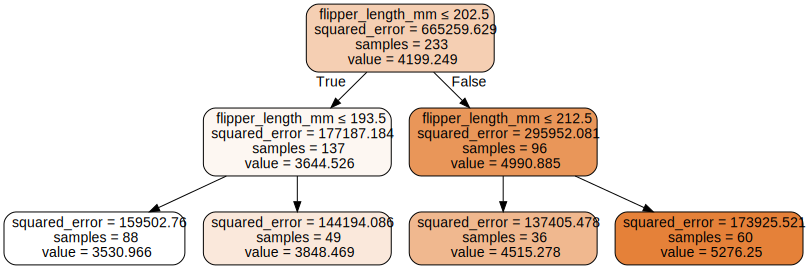

In [51]:
plot_tree_regression(dt_regression, features)

## Assignment 18

In [52]:
songs = pd.read_csv('songs.csv', index_col='Unnamed: 0', quotechar="`") 
songs

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Live,Valence,Duration,Acousticness,Speechiness,Popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [53]:
songs_train, songs_test = train_test_split(songs.fillna(value=1).dropna(), test_size=0.3, random_state=42)
print(songs_train.shape, songs_test.shape)

(422, 14) (181, 14)


In [54]:
features= ['BPM', 'Energy', 'Acousticness', 'Popularity', 'dB', 'Live', 'Valence', 'Duration']
dt_regression = DecisionTreeRegressor(max_depth = 4)
dt_regression.fit(songs_train[features], songs_train['Danceability'])

DecisionTreeRegressor(max_depth=4)

In [55]:
predictions_train = dt_regression.predict(songs_train[features])
predictions_train

array([72.19883041, 48.23076923, 72.19883041, 66.32075472, 63.04761905,
       63.04761905, 63.04761905, 63.04761905, 66.32075472, 72.19883041,
       66.32075472, 72.19883041, 72.19883041, 53.5       , 66.32075472,
       53.5       , 72.19883041, 72.19883041, 48.23076923, 72.19883041,
       72.19883041, 66.32075472, 72.19883041, 72.19883041, 63.04761905,
       72.19883041, 72.19883041, 48.23076923, 70.5       , 63.04761905,
       66.32075472, 72.19883041, 72.19883041, 72.19883041, 63.04761905,
       72.19883041, 54.28      , 72.19883041, 72.19883041, 66.32075472,
       66.32075472, 72.19883041, 66.32075472, 72.19883041, 72.19883041,
       72.19883041, 35.        , 72.19883041, 72.19883041, 54.28      ,
       72.19883041, 55.85714286, 37.45454545, 66.32075472, 30.4       ,
       63.04761905, 63.04761905, 66.32075472, 30.4       , 66.32075472,
       66.32075472, 53.5       , 63.04761905, 66.32075472, 58.84615385,
       72.19883041, 72.19883041, 72.19883041, 72.19883041, 72.19

In [56]:
predictions_test = dt_regression.predict(songs_test[features])
predictions_test

array([72.19883041, 72.19883041, 63.04761905, 54.28      , 54.28      ,
       66.32075472, 66.32075472, 66.32075472, 66.32075472, 58.84615385,
       66.32075472, 72.19883041, 58.84615385, 66.32075472, 55.85714286,
       66.32075472, 72.19883041, 72.19883041, 66.32075472, 66.32075472,
       72.19883041, 66.32075472, 66.32075472, 72.19883041, 66.32075472,
       63.04761905, 72.19883041, 72.19883041, 70.5       , 66.32075472,
       63.04761905, 72.19883041, 66.32075472, 72.19883041, 37.45454545,
       66.32075472, 54.28      , 30.4       , 72.19883041, 66.32075472,
       72.19883041, 66.32075472, 48.23076923, 55.85714286, 54.28      ,
       72.19883041, 72.19883041, 63.04761905, 63.04761905, 72.19883041,
       48.23076923, 30.4       , 72.19883041, 72.19883041, 63.04761905,
       66.32075472, 66.32075472, 65.5       , 63.        , 72.19883041,
       66.32075472, 66.32075472, 72.19883041, 55.85714286, 72.19883041,
       63.04761905, 66.32075472, 54.28      , 66.32075472, 66.32

In [57]:
predictionsOnTrainset = dt_regression.predict(songs_train[features])
predictionsOnTestset = dt_regression.predict(songs_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, songs_train.Popularity)
rmseTest = calculate_rmse(predictionsOnTestset, songs_test.Popularity)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 17.031802793966502
RMSE on test set 16.806555118827646


De RMSE van de test set is lager dan de RMSE van de training set. Echter scheelt het niet veel meer, als de boom 1 laag dieper wordt gemaakt wordt de RMSE van de train set lager dan die van de test set. Wanneer dit gebeurt is er spraak van overfitting. De train set wordt dan te specifiek getraind waardoor er geen goede voorspellingen meer gemaakt kunnen worden. 

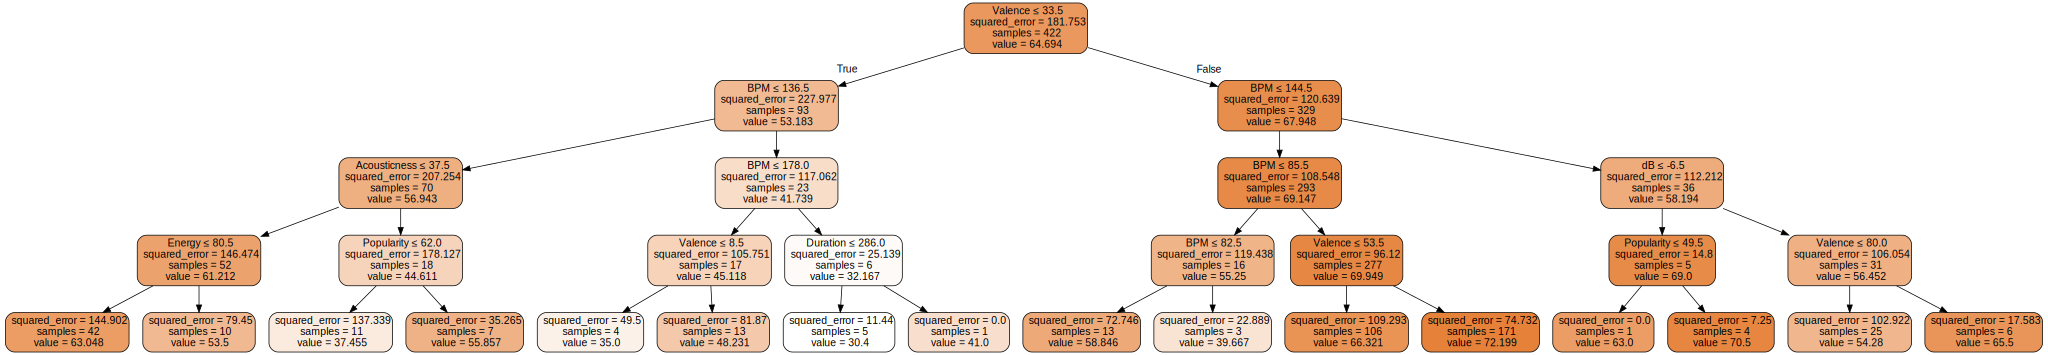

In [58]:
plot_tree_regression(dt_regression, features)